In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class SalesAnalysis:    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, encoding='latin-1')
        
    def clean_data(self):
        # Remove rows with missing values
        self.df.dropna(inplace=True)
        
        # Remove duplicates
        self.df.drop_duplicates(inplace=True)
        
        # Convert date strings to datetime objects
        self.df['Order Date'] = pd.to_datetime(self.df['Order Date'])
        
        # Convert numerical values to appropriate data types
        self.df['Quantity'] = self.df['Quantity'].astype(int)
        self.df['Sales'] = self.df['Sales'].astype(float)
    
    def sales_by_region(self):
        plt.figure(figsize=(10,6))
        sns.barplot(x='Region', y='Quantity', data=self.df)
        plt.title('Sales by Region')
        plt.xlabel('Region')
        plt.ylabel('Quantity')
        plt.show()
        
    def sales_by_date(self, max_date = None, min_date=None):
        min_date = pd.to_datetime(min_date)
        max_date = pd.to_datetime(max_date)
        if min_date > max_date :
            return "Your dates aren't correct please enter again !"
        plt.figure(figsize=(10,6))
        if max_date and min_date:
            d = self.df[self.df['Order Date']> min_date][self.df['Order Date'] <max_date]
            sns.lineplot(x='Order Date', y='Sales', data=d)
        elif max_date : 
            sns.lineplot(x='Order Date', y='Sales', data=self.df[self.df['Order Date']<max_date])
        elif min_date:
            sns.lineplot(x='Order Date', y='Sales', data=self.df[self.df['Order Date']>min_date])
        else : 
            sns.lineplot(x='Order Date', y='Sales', data=self.df)

        plt.title('Sales by Date')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.show()
        
    def sales_by_category(self, limit_sales=None):
        plt.figure(figsize=(10,6))
        if limit_sales :
            sns.boxplot(x='Category', y='Sales', data=self.df[df['Sales']<limit_sales])
        else :
            sns.boxplot(x='Category', y='Sales', data=self.df)
        plt.title('Sales by Category')
        plt.xlabel('Category')
        plt.ylabel('Sales')
        plt.show()
        
    def total_revenue(self):
        return np.sum(self.df['Sales'])
        
    def average_quantity(self):
        return np.mean(self.df['Quantity'])
        
    def median_revenue(self):
        return np.median(self.df['Sales'])
        
    def total_revenue_by_region(self):
        return self.df.groupby('Region')['Sales'].sum()
    
    def average_quantity_by_region(self):
        return self.df.groupby('Region')['Quantity'].mean()
    
    def  median_revenue_by_region(self):
        return self.df.groupby('Region')['Sales'].median()
    

In [25]:
df = pd.read_csv('superstore_dataset.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [27]:
sl = SalesAnalysis('superstore_dataset.csv')
sl.df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [28]:
sl.clean_data()

/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_8935/1300027860.py:18: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  self.df['Order Date'] = pd.to_datetime(self.df['Order Date'])


In [29]:
sl.df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
7,34662,CA-2011-115161,2011-01-02,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
27,37844,CA-2011-113880,2011-01-03,5/3/2011,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,...,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,6,0.30,-172.1172,70.05,High
32,31454,CA-2011-104269,2011-01-03,6/3/2011,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,Washington,...,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.20,51.4764,47.89,Medium
34,39607,CA-2011-168312,2011-01-03,7/3/2011,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,...,FUR-TA-10001866,Furniture,Tables,Bevis Round Conference Room Tables and Bases,376.509,3,0.30,-43.0296,32.70,Medium
36,39245,CA-2011-131009,2011-01-03,5/3/2011,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,362.250,6,0.30,0.0000,25.22,Medium


In [30]:
sl.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 7 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   object        
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Country         9994 non-null   object        
 11  Postal Code     9994 non-null   float64       
 12  Market          9994 non-null   object        
 13  Region          9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Cat

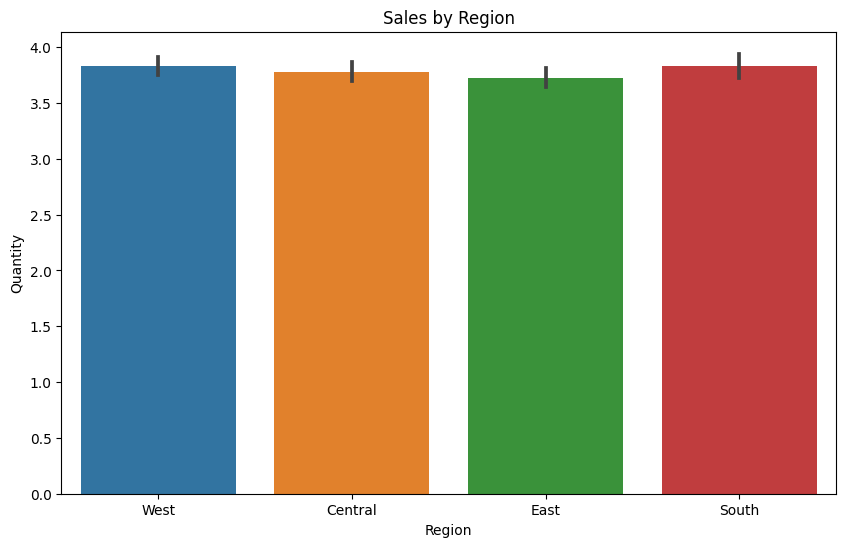

In [31]:
sl.sales_by_region()

/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_8935/1300027860.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d = self.df[self.df['Order Date']> min_date][self.df['Order Date'] <max_date]


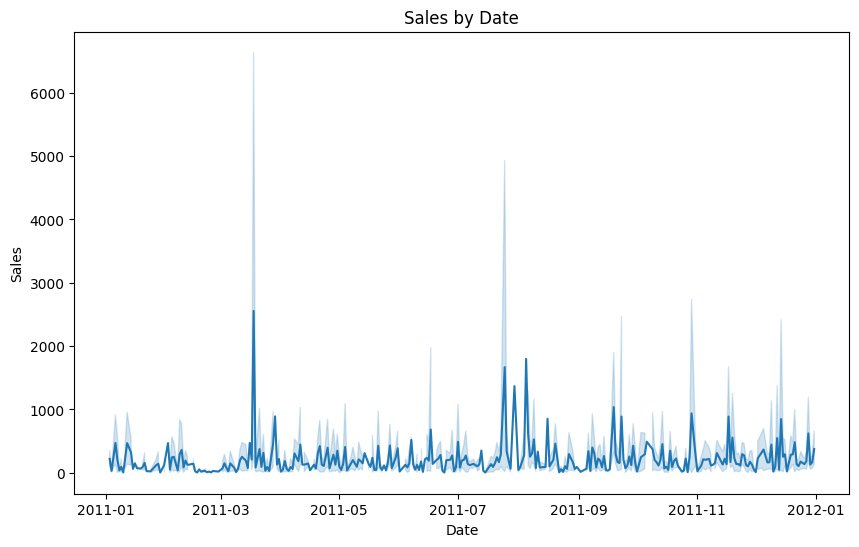

In [32]:
sl.sales_by_date(max_date = "2012-01-02", min_date="2011-01-02")

/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_8935/1300027860.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x='Category', y='Sales', data=self.df[df['Sales']<limit_sales])


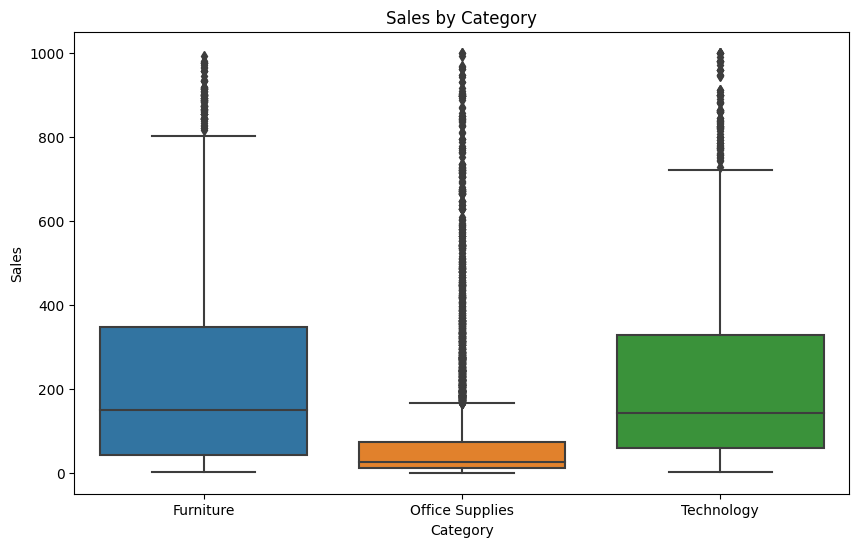

In [33]:
sl.sales_by_category(limit_sales=1000)

In [34]:
sl.total_revenue()

2297200.8603

In [35]:
sl. average_quantity()

3.789573744246548

In [36]:
sl.median_revenue()

54.489999999999995

In [38]:
sl.total_revenue_by_region()

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [39]:
sl.median_revenue_by_region()

Region
Central    45.980
East       54.900
South      54.594
West       60.840
Name: Sales, dtype: float64

In [40]:
sl.average_quantity_by_region()

Region
Central    3.779595
East       3.728230
South      3.832716
West       3.829535
Name: Quantity, dtype: float64